# Capstone 3: Data Wrangling/Exploratory Data Analysis

Data source: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

## 1. Loads

In [1]:
#load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import sent_tokenize

In [2]:
#load data
data = pd.read_csv('job_postings.csv', index_col=0)

In [3]:
#check data load
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## 2. Overall Check

In [4]:
#check general information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 1 to 17880
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

* Many null values for several explanatory variables
* No null values for the target variable 'fraudulent'
* Categorical and text variables only, no numeric variables

In [5]:
#check for duplicates
data.duplicated().sum()

281

In [6]:
#drop duplicates
df = pd.DataFrame(data.drop_duplicates())

In [7]:
#check target variable classes
df.fraudulent.value_counts()

0    16743
1      856
Name: fraudulent, dtype: int64

* Very imbalanced classes

## 3. Categorical Variables

### 3.1 Filling Missing Values 

In [8]:
#check null value percentages 
(round(df.isnull().sum()/len(df)*100, 2)).sort_values(ascending=False)

salary_range           83.94
department             64.37
required_education     45.51
benefits               40.38
required_experience    39.56
function               36.16
industry               27.48
employment_type        19.48
company_profile        18.65
requirements           15.05
location                1.94
description             0.01
title                   0.00
telecommuting           0.00
has_questions           0.00
has_company_logo        0.00
fraudulent              0.00
dtype: float64

In [9]:
#check salary_range column
df.salary_range.value_counts()

0-0            141
40000-50000     66
30000-40000     54
45000-67000     36
25000-30000     36
              ... 
60-75            1
27500-36000      1
20-22            1
110-120          1
3700-3800        1
Name: salary_range, Length: 874, dtype: int64

* 84% missing values
* Inconsistent ranges, perhaps due to hourly/annual salary differences
* Any distribution based on actual salary value will likely not be relevant
* However, fraud may be predicted by a 'fake' salary range
* Convert to a boolean variable for now, potentially drop variable later

In [10]:
#create has_salary column to replace salary_range
df['has_salary'] = df.salary_range.notnull().astype('int')

#drop salary_range column
df.drop(columns=['salary_range'], inplace=True)

In [11]:
#check required_education
df.required_education.value_counts()

Bachelor's Degree                    5099
High School or equivalent            1989
Unspecified                          1369
Master's Degree                       416
Associate Degree                      264
Certification                         165
Some College Coursework Completed     100
Professional                           73
Vocational                             47
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

* 'Unspecified' column already exists
* Multiple 'Vocational' values

In [12]:
#fill missing values with 'Unspecified'
df.required_education.fillna('Unspecified', inplace=True)

In [13]:
#consolidate vocational values
df.required_education.replace(to_replace=['Vocational - HS Diploma','Vocational - Degree'], value='Vocational', inplace=True)


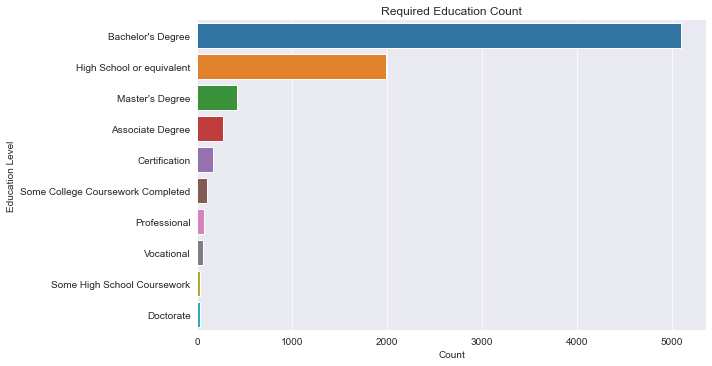

In [14]:
#check distribution of education
order = df[df.required_education != 'Unspecified'].required_education.value_counts().index
sns.set_style("darkgrid")
sns.catplot(y='required_education', data=df[df.required_education != 'Unspecified'], order=order, kind='count', orient='h', aspect=2)
plt.title('Required Education Count')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

In [15]:
#check required_experience
df.required_experience.value_counts()

Mid-Senior level    3768
Entry level         2637
Associate           2267
Not Applicable      1070
Director             383
Internship           372
Executive            140
Name: required_experience, dtype: int64

* 'Not Applicable' may mean no experience is required
* Fill missing values with 'Unspecified' to be consistent with education_required values 

In [16]:
#fill missing values with 'Unspecified'
df.required_experience.fillna('Unspecified', inplace=True)

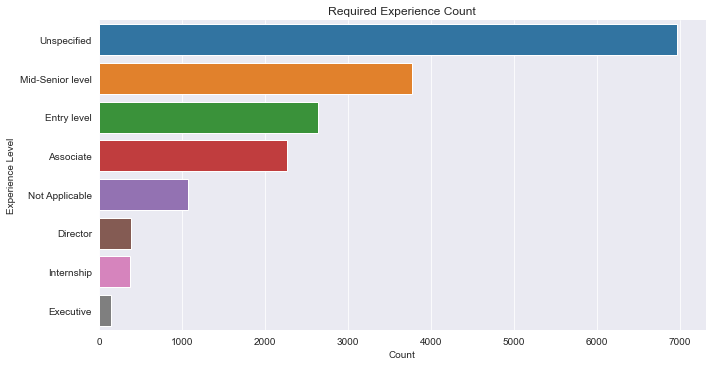

In [17]:
#check distribution of required_experience
order = df.required_experience.value_counts().index
sns.catplot(y='required_experience', data=df, order=order, kind='count', orient='h', aspect=2)
plt.title('Required Experience Count')
plt.xlabel('Count')
plt.ylabel('Experience Level')
plt.show()

In [18]:
#Check employment_type
df.employment_type.value_counts()

Full-time    11423
Contract      1514
Part-time      772
Temporary      237
Other          225
Name: employment_type, dtype: int64

In [19]:
#fill missing values with 'Unspecified'
df.employment_type.fillna('Unspecified', inplace=True)

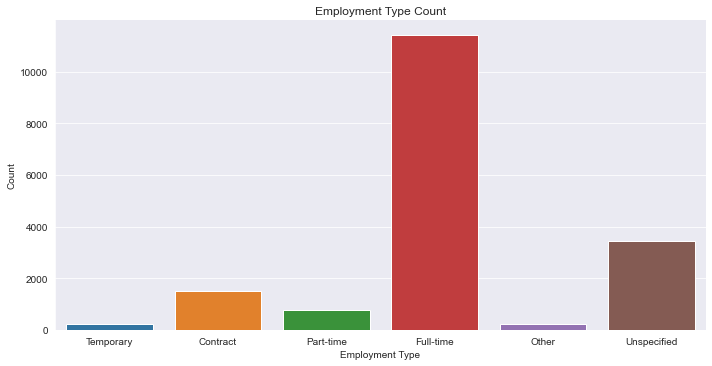

In [20]:
#check distribution of employment_type
order=['Temporary','Contract','Part-time','Full-time','Other','Unspecified']
sns.catplot(x='employment_type', data=df, order=order, kind='count', aspect=2)
plt.title('Employment Type Count')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

In [21]:
#Check location
df.location.value_counts().head()

GB, LND, London          718
US, NY, New York         644
US, CA, San Francisco    466
GR, I, Athens            462
US, ,                    339
Name: location, dtype: int64

* Location can be separated out into three separate columns: country, state, city

### 3.2 Create Geographical Variables

In [22]:
#Create country column
df['country'] = df.location.str.split(',').str[0]
print(df.country.nunique())
df.country.value_counts()

90


US    10460
GB     2329
GR      938
CA      450
DE      382
      ...  
SI        1
PE        1
SD        1
UG        1
KH        1
Name: country, Length: 90, dtype: int64

In [23]:
#Check missing values
df.country.isnull().sum()

341

In [24]:
#fill missing values with 'Unspecified'
df.country.fillna('Unspecified', inplace=True)

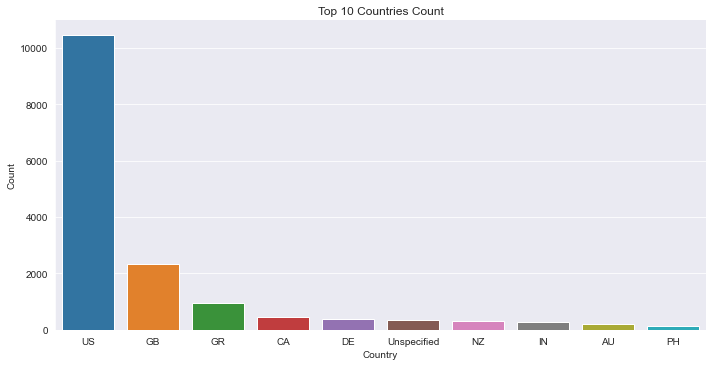

In [25]:
#check distribution of top 10 countries
top_10_countries = df.country.value_counts().head(10).rename_axis('country').reset_index(name='count')
sns.catplot(x='country', y='count', kind='bar', data=top_10_countries, aspect=2)
plt.title('Top 10 Countries Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [26]:
#Create state column
df['state'] = df.location.str.split(',').str[1]
print(df.state.nunique())
df.state.value_counts()

325


        2108
 CA     2012
 NY     1228
 LND     991
 TX      957
        ... 
 ENF       1
 D         1
 061       1
 82        1
 NLE       1
Name: state, Length: 325, dtype: int64

* Some countries may not refer to sub-regions as 'states' and may instead refer to them by a numeric code
* Numeric strings within the 'state' columns will be left as-is

In [27]:
#Check missing values
df.state.isnull().sum()

432

In [28]:
#Fill missing values with 'Unspecified'
df.state.fillna('Unspecified', inplace=True)

In [29]:
#Create city column
df['city'] = df.location.str.split(',').str[2]

#lowercase and trim whitespace
df.city = df.city.str.upper().str.strip()

print(df.city.nunique())
df.city.value_counts()

2026


                     1620
LONDON               1101
NEW YORK              685
ATHENS                558
SAN FRANCISCO         488
                     ... 
PERTH AND KINROSS       1
RIDGEWOOD               1
GAFFNEY                 1
AHENS                   1
BERKELEY HEIGHTS        1
Name: city, Length: 2026, dtype: int64

* Some values are misentered (incorrect spelling, entered state instead of city)
* Errors may be indicative of fraud and will be left as-is

In [30]:
#Check missing values
df.city.isnull().sum()

432

In [31]:
#Fill missing values with 'Unspecified'
df.city.fillna('Unspecified', inplace=True)

In [32]:
#Drop location column
df.drop(columns=['location'], inplace=True)

### 3.3 Overlapping Values

* The columns 'department', 'function', 'industry' have many overlapping values

In [33]:
# department unique values and top 10 values``
print('total unique departments: ', df.department.nunique())
print('top 10 departments:')
print(df.department.value_counts().head(10))

total unique departments:  1337
top 10 departments:
Sales                     541
Engineering               483
Marketing                 397
Operations                266
IT                        224
Development               146
Product                   112
Information Technology     86
Design                     76
Technology                 75
Name: department, dtype: int64


* Inconsistency in categorization (ex. IT vs Information Technology, tech VS Technology)

In [34]:
# function unique values and top 10 values``
print('total unique functions: ', df.function.nunique())
print('top 10 functions:')
print(df.function.value_counts().head(10))

total unique functions:  37
top 10 functions:
Information Technology    1730
Sales                     1448
Engineering               1339
Customer Service          1180
Marketing                  818
Administrative             613
Design                     336
Health Care Provider       326
Other                      325
Education                  325
Name: function, dtype: int64


* Categorized more consistently than 'department'

In [35]:
# industry unique values and top 10 values``
print('total unique industries: ', df.industry.nunique())
print('top 10 industries:')
print(df.industry.value_counts().head(10))

total unique industries:  131
top 10 industries:
Information Technology and Services    1711
Computer Software                      1362
Internet                               1054
Education Management                    819
Marketing and Advertising               818
Financial Services                      748
Hospital & Health Care                  483
Consumer Services                       348
Telecommunications                      326
Oil & Energy                            286
Name: industry, dtype: int64


* Of the three, 'department' has by far the most missing values (~65%) and is the least consistently categorized (1337 unique values)
* The remaining two have fewer missing values: 'function' (36%) and 'industry' (27%), and are relatively more consistently categorized: 'function' (37 unique values) and 'industry' (131 unique values)
* Drop the 'department' column, keep 'function' and 'industry'

In [36]:
# drop department
df.drop(columns=['department'], inplace=True)

In [37]:
#fill missing values with 'Unspecified'
df.function.fillna('Unspecified', inplace=True)
df.industry.fillna('Unspecified', inplace=True)

### 3.4 Define variables lists

In [38]:
#create list of text variables
text = ['title','company_profile','description','requirements','benefits']

In [39]:
#create list of categorical names by removing text and target variables
categorical = [column for column in df.columns if column not in text and column != 'fraudulent']

## 4. Numeric Variables

* Basic numeric features will be created from the text before the text is transformed during vectorization 
* TFIDF analysis will be done after the train/test split to prevent data leakage

In [40]:
#create title character count variable
df['title_char'] = df.title.apply(len)

In [41]:
#function for word count
def word_count(text):
    return len(text.split())

In [42]:
#combine all text
combined_text = df[text].apply(lambda x: ' '.join(x.values.astype(str)), axis=1)

#create total word count variable
df['total_word'] = combined_text.astype('str').apply(word_count)

In [43]:
# function for sentence count
def sent_count(text):
    return len(sent_tokenize(text))

In [44]:
#create total sentence count
df['total_sent'] = combined_text.astype('str').apply(sent_count)

In [45]:
#create average words per sentence
df['avg_words_sent'] = df['total_word']/df['total_sent']

In [46]:
#define numeric variable list
numeric = ['title_char','total_word','total_sent','avg_words_sent']

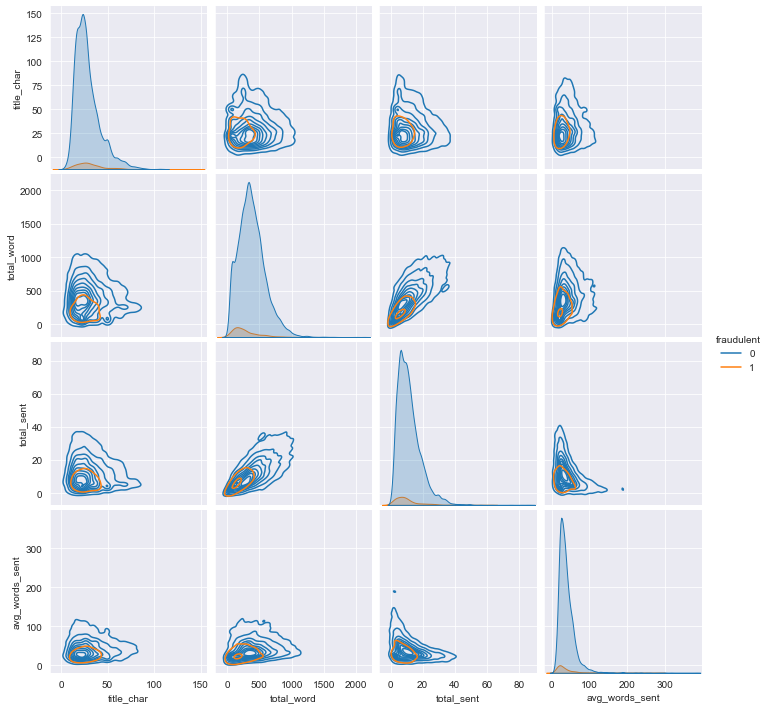

In [47]:
#check pair plots
sns.pairplot(data=df, vars=numeric, hue='fraudulent', kind='kde')
plt.show()

* In general, it looks like fraudulent job postings tend to be shorter overall: title character lenghth, word count, sentence count, and average words per sentence are lower than non-fraudulent postings
* Distributions indicate numeric variables will need to be scaled during preprocessing

## 5. Target Variable

In [48]:
#check class imbalance percentage
print('% of fraudulent job postings: ', round(df.fraudulent.sum()/len(df.fraudulent)*100, 2))

% of fraudulent job postings:  4.86


* The 'fraudulent' class is less than 5% of the data
* Minority class can by oversampled synthetically during preprocessing
* Oversampling will be done after text vectorization

In [49]:
#define target variable
y = df.fraudulent
X = df.drop('fraudulent', axis=1)

In [50]:
#save file
cleaned = df.to_csv('cleaned.csv', index=False)

## 6. Next Steps

* Split data into train and test sets
* One-hot encode categorical variables
* Scale numeric variables
* Vectorize text variables
* Oversample minority class for target variable
* Modeling